In [ ]:
# Function to recommend restaurants based on user preferences
def recommend_restaurants(user_preferences, data):
    """
    Recommends restaurants based on user preferences.

    Parameters:
    - user_preferences: A dictionary with the user's preferred criteria (e.g., cuisine, price range).
    - data: The cleaned dataset.

    Returns:
    - A DataFrame with the top recommended restaurants.
    """
    # Filter the dataset based on user preferences
    recommendations = data

    # Filter by cuisine preference if provided
    if 'cuisine' in user_preferences:
        cuisine_pref = user_preferences['cuisine']
        recommendations = recommendations[recommendations['Cuisines'] == cuisine_pref]

    # Filter by price range if provided
    if 'price_range' in user_preferences:
        price_range = user_preferences['price_range']
        recommendations = recommendations[recommendations['Average Cost for two'] <= price_range]

    # Filter by delivery options if provided
    if 'has_online_delivery' in user_preferences:
        has_online_delivery = user_preferences['has_online_delivery']
        recommendations = recommendations[recommendations['Has Online delivery'] == has_online_delivery]

    return recommendations


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Binning the target (Aggregate rating) into categorical classes (example: 1-2 low, 3 medium, 4-5 high)
bins = [0, 2, 3.5, 5]  # Define bins for ratings
labels = ['low', 'medium', 'high']  # Define labels for the bins
data_cleaned['rating_category'] = pd.cut(data_cleaned['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Features and target
features = ['Average Cost for two', 'Has Online delivery', 'Has Table booking', 'Is delivering now']
target = 'rating_category'  # New categorical target

# Prepare the dataset (X = features, y = target)
X = data_cleaned[features]
y = data_cleaned[target]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Show the first 10 predicted and actual values for comparison
pred_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred_vs_actual.head(10))


Accuracy: 0.47175732217573224
Confusion Matrix:
[[ 51  61 187]
 [  7  22 201]
 [ 28  21 378]]
Classification Report:
              precision    recall  f1-score   support

        high       0.59      0.17      0.26       299
         low       0.21      0.10      0.13       230
      medium       0.49      0.89      0.63       427

    accuracy                           0.47       956
   macro avg       0.43      0.38      0.34       956
weighted avg       0.46      0.47      0.40       956

      Actual Predicted
4731  medium    medium
1468    high    medium
9037  medium    medium
7866    high    medium
5570  medium    medium
5613     low    medium
7751  medium    medium
1662     low       low
8592    high    medium
2164    high    medium


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test) # Change x_test to X_test

In [ ]:
y_test

,rating_category
4731,medium
1468,high
9037,medium
7866,high
5570,medium
...,...
2232,medium
6123,medium
353,high
304,high


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.47175732217573224

In [ ]:
from mlxtend.plotting import plot_decision_regions

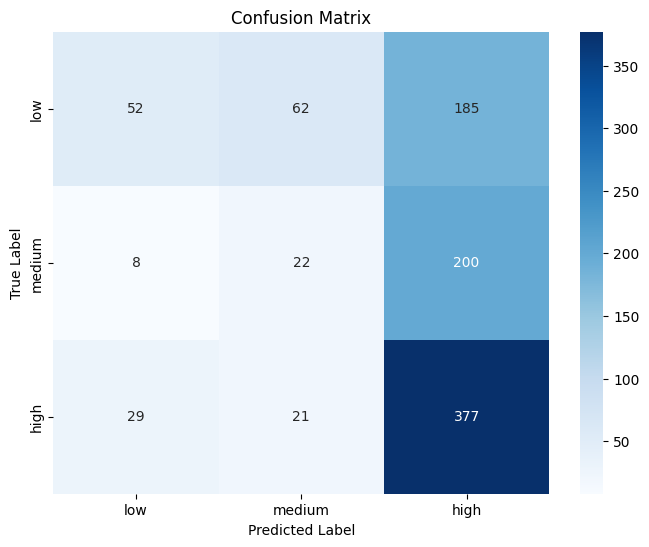

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-5-08693bd2a3f7>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_restaurants['Predicted Category'] = model.predict(X_recommended)


      Restaurant Name  Average Cost for two Predicted Category
1343        Cake 24x7                   600             medium
4703   Midnight Fries                   550             medium
8651  Hungry Minister                   400             medium
8441  Hungry Minister                   400             medium
5760     Aurangzeb Rd                   500             medium


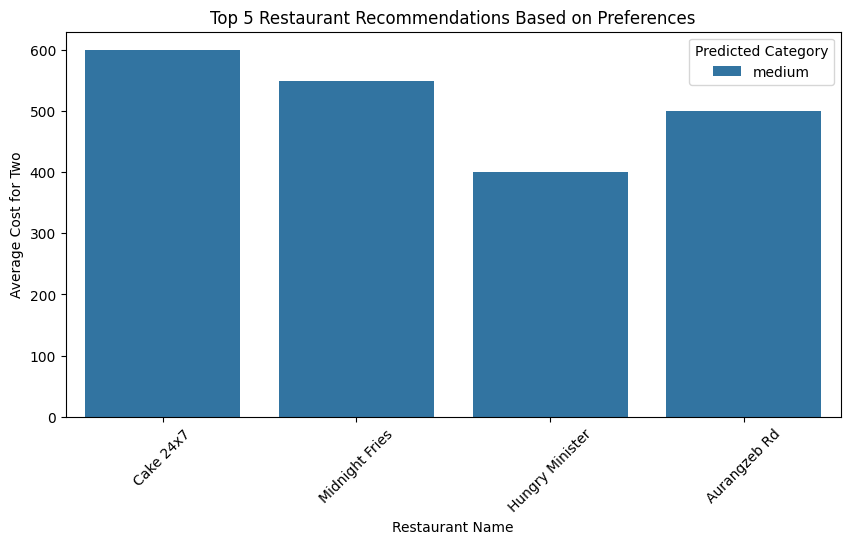

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace with correct file path if needed)
file_path_new = '/content/Dataset .csv'
data_new = pd.read_csv(file_path_new)

# Define the features and target for the model
features = ['Average Cost for two', 'Has Online delivery', 'Has Table booking', 'Is delivering now']
target = 'rating_category'  # You should have a 'rating_category' column in your dataset for this to work

# Binning the target (Aggregate rating) into categorical classes
bins = [0, 2, 3.5, 5]
labels = ['low', 'medium', 'high']
data_new['rating_category'] = pd.cut(data_new['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Prepare the dataset (X = features, y = target)
data_new['Has Online delivery'] = data_new['Has Online delivery'].map({'Yes': 1, 'No': 0})
data_new['Has Table booking'] = data_new['Has Table booking'].map({'Yes': 1, 'No': 0})
data_new['Is delivering now'] = data_new['Is delivering now'].map({'Yes': 1, 'No': 0})
X = data_new[features]
y = data_new[target]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Example user preferences for recommending a restaurant
user_preference = {
    'Average Cost for two': 500,  # Desired average cost for two people
    'Has Online delivery': 1,     # 1 for online delivery preference
    'Has Table booking': 0,       # 0 means table booking is not required
    'Is delivering now': 1        # 1 means immediate delivery preference
}

# Filter restaurants based on user preferences
recommended_restaurants = data_new[
    (data_new['Average Cost for two'] <= user_preference['Average Cost for two'] * 1.2) &  # +/- 20% cost range
    (data_new['Has Online delivery'] == user_preference['Has Online delivery']) &
    (data_new['Has Table booking'] == user_preference['Has Table booking']) &
    (data_new['Is delivering now'] == user_preference['Is delivering now'])
]

# Prepare the filtered dataset for prediction
X_recommended = recommended_restaurants[features]

# Predict rating categories for the filtered restaurants using the logistic regression model
recommended_restaurants['Predicted Category'] = model.predict(X_recommended)

# Sort the restaurants based on the predicted category ('high', 'medium', 'low')
recommended_restaurants_sorted = recommended_restaurants.sort_values(by='Predicted Category', ascending=False)

# Output the top recommended restaurants
top_recommendations = recommended_restaurants_sorted[['Restaurant Name', 'Average Cost for two', 'Predicted Category']].head(5)
print(top_recommendations)

# Visualize top 5 recommendations if desired
plt.figure(figsize=(10, 5))
sns.barplot(x='Restaurant Name', y='Average Cost for two', hue='Predicted Category', data=top_recommendations)
plt.title("Top 5 Restaurant Recommendations Based on Preferences")
plt.xlabel("Restaurant Name")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45)
plt.show()


In [6]:
import pickle

In [8]:
# Save the trained logistic regression model

pickle.dump(model, open('Restaurant_Recommendation.pkl', 'wb'))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter your preferred average cost for two: 600
Do you prefer restaurants with online delivery? (1 for Yes, 0 for No): 1
Do you require table booking? (1 for Yes, 0 for No): 0
Do you want the restaurant to be delivering now? (1 for Yes, 0 for No): 1


<ipython-input-3-2736faa39bb5>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_restaurants['Predicted Category'] = model.predict(X_recommended)



Top 5 Recommended Restaurants:
            Restaurant Name  Average Cost for two Predicted Category
1343             Cake 24x7                   600             medium
1345            Cake Point                   600             medium
8737  The Chickmunks Caf��                   550             medium
8651       Hungry Minister                   400             medium
8441       Hungry Minister                   400             medium


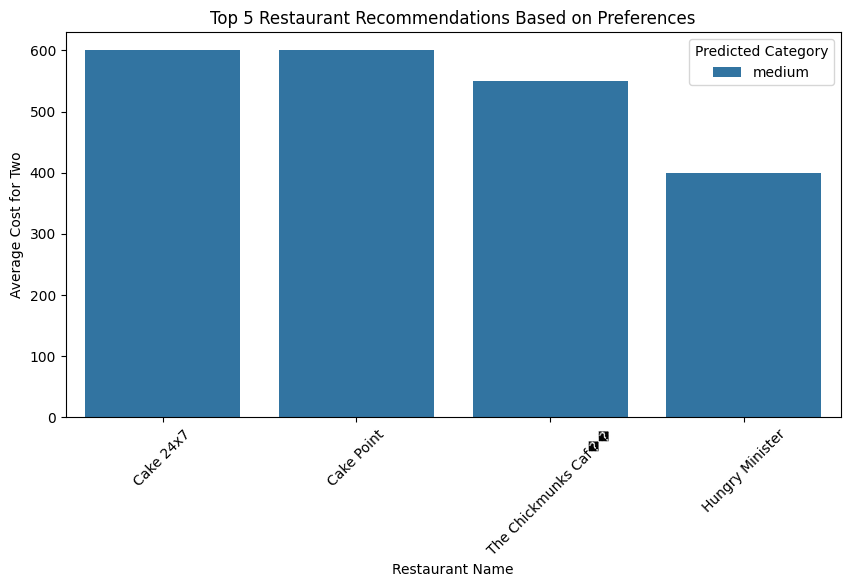

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter your preferred average cost for two: 1000
Do you prefer restaurants with online delivery? (1 for Yes, 0 for No): 0
Do you require table booking? (1 for Yes, 0 for No): 1
Do you want the restaurant to be delivering now? (1 for Yes, 0 for No): 1
No restaurants match your preferences.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace with correct file path if needed)
file_path_new = '/content/Dataset .csv'
data_new = pd.read_csv(file_path_new)

# Define the features and target for the model
features = ['Average Cost for two', 'Has Online delivery', 'Has Table booking', 'Is delivering now']
target = 'rating_category'  # You should have a 'rating_category' column in your dataset for this to work

# Binning the target (Aggregate rating) into categorical classes
bins = [0, 2, 3.5, 5]
labels = ['low', 'medium', 'high']
data_new['rating_category'] = pd.cut(data_new['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Prepare the dataset (X = features, y = target)
data_new['Has Online delivery'] = data_new['Has Online delivery'].map({'Yes': 1, 'No': 0})
data_new['Has Table booking'] = data_new['Has Table booking'].map({'Yes': 1, 'No': 0})
data_new['Is delivering now'] = data_new['Is delivering now'].map({'Yes': 1, 'No': 0})
X = data_new[features]
y = data_new[target]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Take user input for preferences
user_cost = int(input("Enter your preferred average cost for two: "))
user_online_delivery = int(input("Do you prefer restaurants with online delivery? (1 for Yes, 0 for No): "))
user_table_booking = int(input("Do you require table booking? (1 for Yes, 0 for No): "))
user_is_delivering = int(input("Do you want the restaurant to be delivering now? (1 for Yes, 0 for No): "))

# Example user preferences for recommending a restaurant
user_preference = {
    'Average Cost for two': user_cost,          # Input from the user for cost
    'Has Online delivery': user_online_delivery,  # Input from the user for online delivery
    'Has Table booking': user_table_booking,      # Input from the user for table booking
    'Is delivering now': user_is_delivering       # Input from the user for immediate delivery
}

# Filter restaurants based on user preferences
recommended_restaurants = data_new[
    (data_new['Average Cost for two'] <= user_preference['Average Cost for two'] * 1.2) &  # +/- 20% cost range
    (data_new['Has Online delivery'] == user_preference['Has Online delivery']) &
    (data_new['Has Table booking'] == user_preference['Has Table booking']) &
    (data_new['Is delivering now'] == user_preference['Is delivering now'])
]

# Check if there are any matching restaurants
if len(recommended_restaurants) == 0:
    print("No restaurants match your preferences.")
else:
    # Prepare the filtered dataset for prediction
    X_recommended = recommended_restaurants[features]

    # Predict rating categories for the filtered restaurants using the logistic regression model
    recommended_restaurants['Predicted Category'] = model.predict(X_recommended)

    # Sort the restaurants based on the predicted category ('high', 'medium', 'low')
    recommended_restaurants_sorted = recommended_restaurants.sort_values(by='Predicted Category', ascending=False)

    # Output the top recommended restaurants
    top_recommendations = recommended_restaurants_sorted[['Restaurant Name', 'Average Cost for two', 'Predicted Category']].head(5)
    print("\nTop 5 Recommended Restaurants:\n", top_recommendations)

    # Visualize top 5 recommendations if desired
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Restaurant Name', y='Average Cost for two', hue='Predicted Category', data=top_recommendations)
    plt.title("Top 5 Restaurant Recommendations Based on Preferences")
    plt.xlabel("Restaurant Name")
    plt.ylabel("Average Cost for Two")
    plt.xticks(rotation=45)
    plt.show()

In [6]:
import pickle

In [7]:
# Save the trained logistic regression model

pickle.dump(model, open('Restaurant_Recommendation.pkl', 'wb'))